In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series



In [3]:
train=pd.read_csv("data/train_traffic_timeseries.csv")
test=pd.read_csv("data/test_traffic_timeseries.csv")
print(train.head())
print(test.head())

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2
      ID          Datetime
0  18288  26-09-2014 00:00
1  18289  26-09-2014 01:00
2  18290  26-09-2014 02:00
3  18291  26-09-2014 03:00
4  18292  26-09-2014 04:00


In [27]:
train_original=train.copy()
test_original=test.copy()

In [28]:
train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [29]:
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [30]:
train.shape,test.shape

((18288, 3), (5112, 2))

In [31]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [32]:
# Values of 5 and 6 represents that the days are weekend.

train['day of week']=train['Datetime'].dt.dayofweek

# Let’s assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend.

def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2
train.head()



,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [33]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis.
train=train.drop('ID',1)# drop ID variable to get only the Datetime on x-axis.




In [34]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


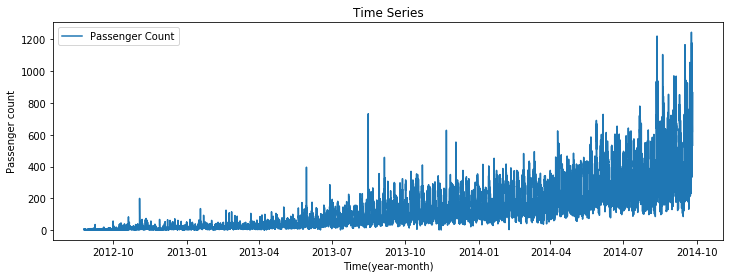

In [35]:

ts = train['Count']
plt.figure(figsize=(12,4))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')


AxesSubplot(0.125,0.125;0.775x0.755)


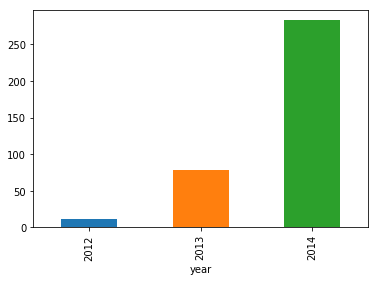

In [37]:
# Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.

print(train.groupby('year')['Count'].mean().plot.bar())


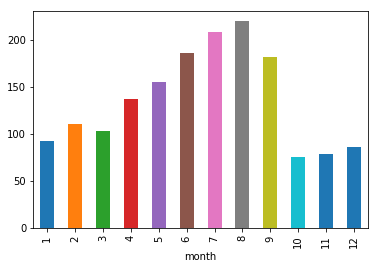

In [40]:
# Our second hypothesis was about increase in traffic from May to October. 
#So, let’s see the relation between count and month.
train.groupby('month')['Count'].mean().plot.bar()
#here we see a decrease in the mean of passenger count in last three months. 
#This does not look right. Let’s look at the monthly mean of each year separately.

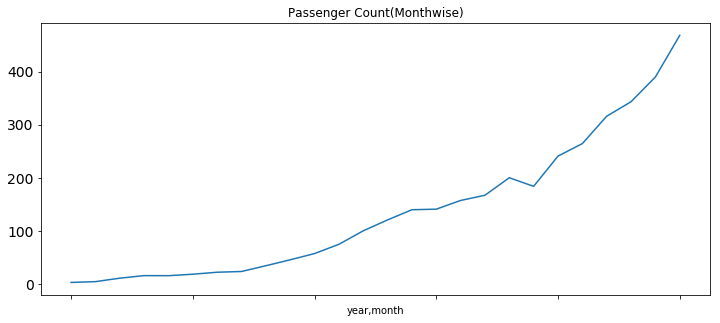

In [45]:

# lis_month = ['jan','feb','mar','apr','may','jun','jul','aug','sept','oct','nov','dec']
#take month of separate year
temp1=train.groupby(['year', 'month'])['Count'].mean()
temp1.plot(figsize=(12,5), title= 'Passenger Count(Monthwise)',  fontsize=14)



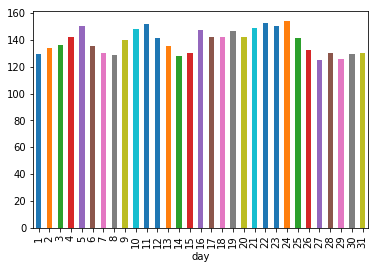

In [46]:
train.groupby('day')['Count'].mean().plot.bar()


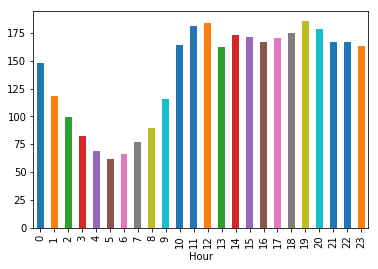

In [71]:
train.groupby('Hour')['Count'].mean().plot.bar()


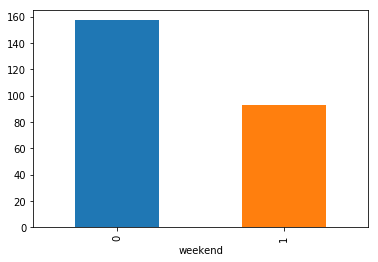

In [48]:
train.groupby('weekend')['Count'].mean().plot.bar()


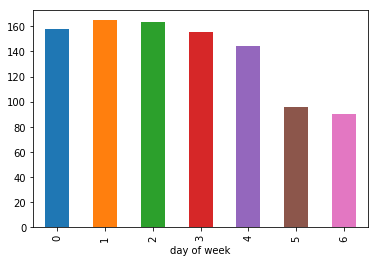

In [58]:
train.groupby('day of week')['Count'].mean().plot.bar()


In [61]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [65]:
# Hourly time series
hourly = train.resample('H').mean()
# Converting to daily mean
daily = train.resample('D').mean()
# Converting to weekly mean
weekly = train.resample('W').mean()
# Converting to monthly mean
monthly = train.resample('M').mean()


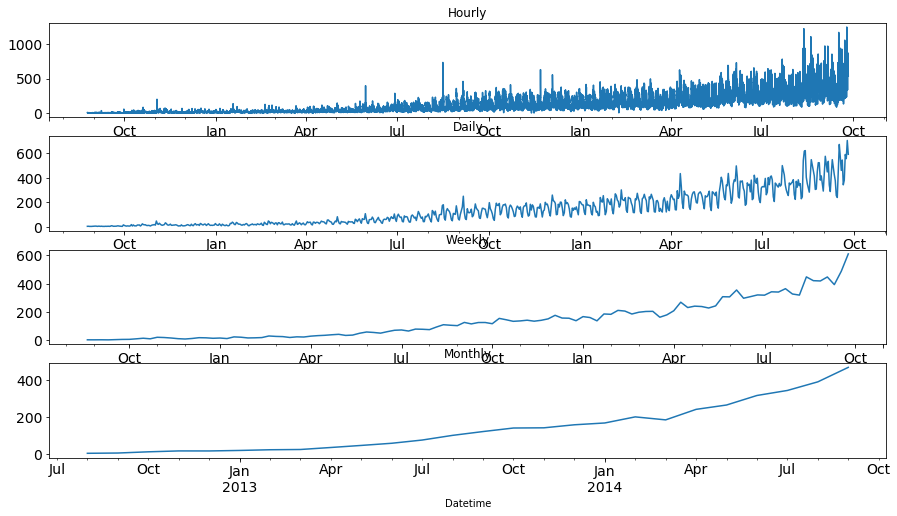

In [63]:
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

In [66]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
# Converting to daily mean
test = test.resample('D').mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [69]:
#split the train dataset into train and validation part
Train=train.ix['2012-08-25':'2014-06-24']
valid=train.ix['2014-06-25':'2014-09-25']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


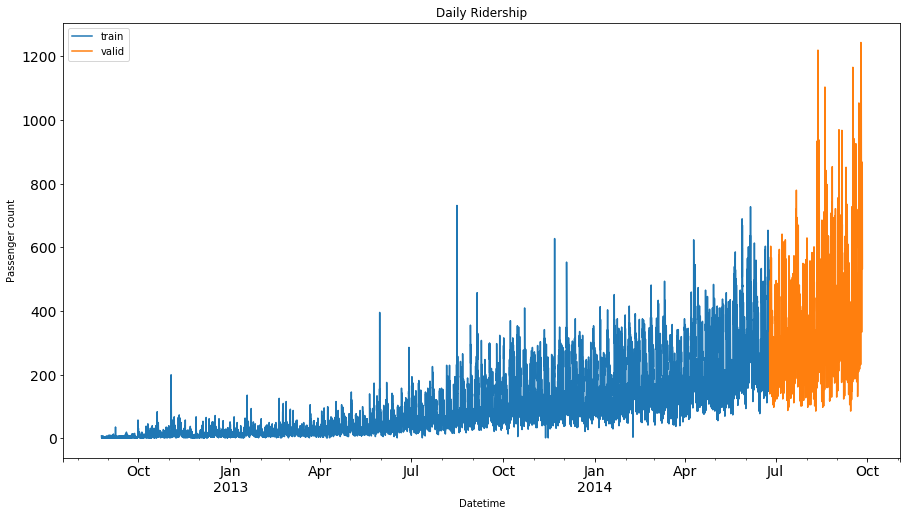

In [72]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()


[  8   2   6 ... 406 352 390]


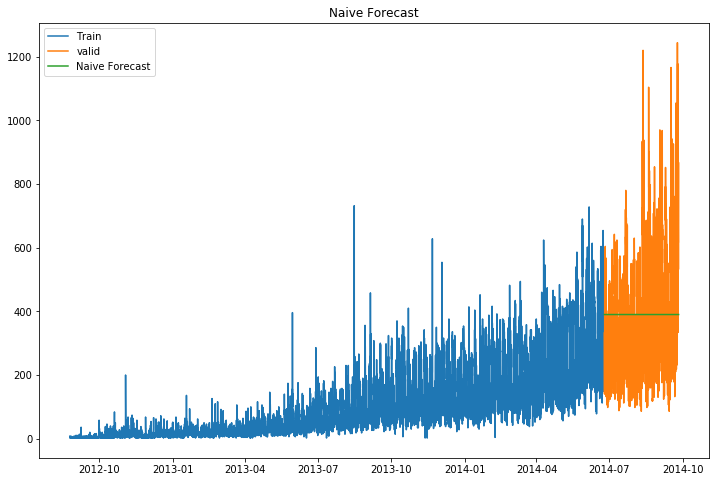

In [79]:
#NAVIE FORECAST
dd = np.asarray(Train.Count)
print(dd)
y_hat = valid.copy()

y_hat['naive'] = dd[len(dd)-1]

plt.figure(figsize= (12,8))
plt.plot(Train.index,Train['Count'],label ='Train')
plt.plot(valid.index,valid['Count'],label = 'valid')
plt.plot(y_hat.index,y_hat['naive'],label = 'Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()


In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count,y_hat.naive))
print(rms)
#this seems to be too large i.e more varaibility in its prediction

186.37368520699056


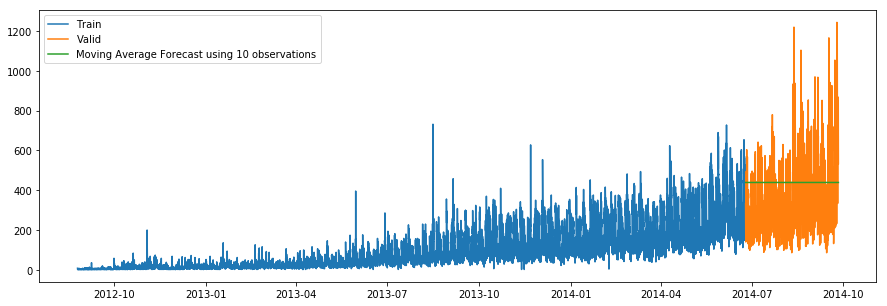

In [82]:
#MOVING AVERAGE METHOD
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

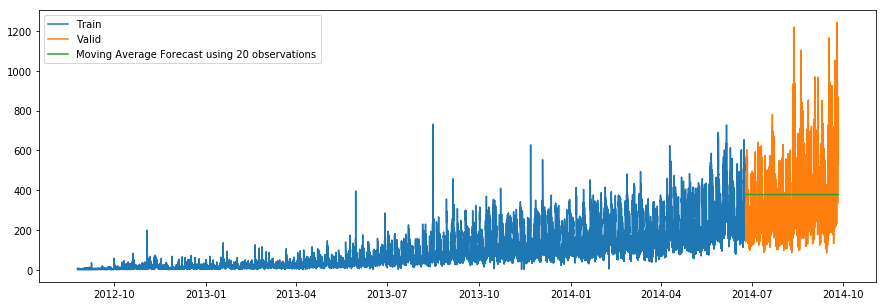

In [83]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()

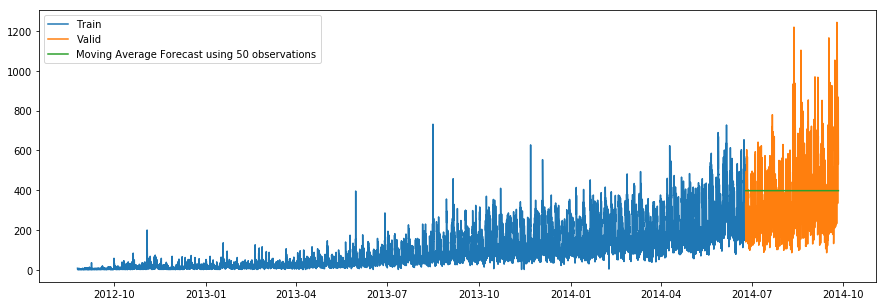

In [84]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [85]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print(rms)

186.5773761711873


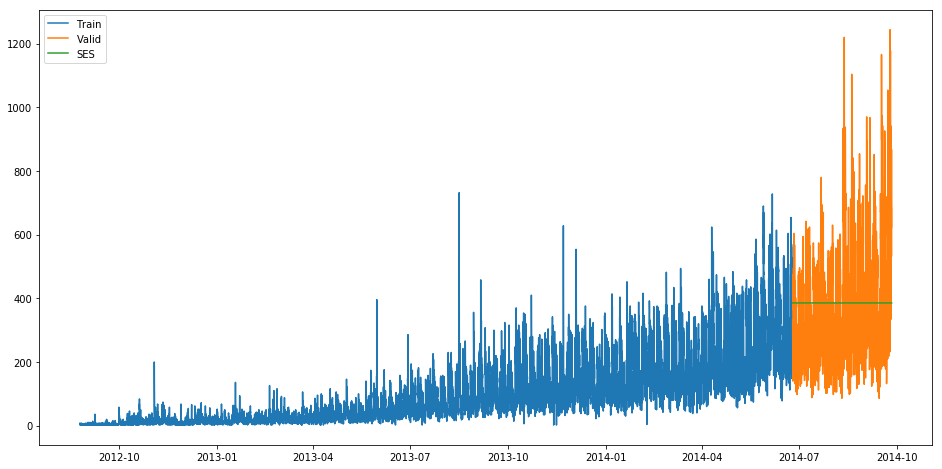

In [86]:
#simple exponential smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [87]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print(rms)

186.40944652452376


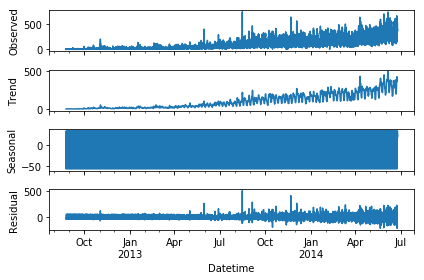

In [88]:
#holts linear trend model
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()


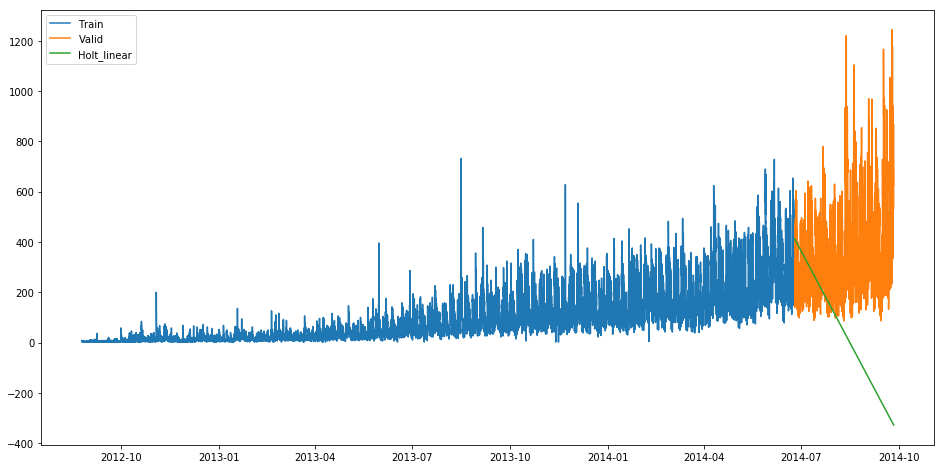

In [89]:
y_hat_avg = valid.copy()

fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [90]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

475.09398202897876
